<a href="https://colab.research.google.com/github/IanWills03/Computational-Intelligence-Assessment/blob/main/Part_2_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 2: ***K-means Clustering***

Preparing the Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from google.colab import drive

drive.mount('/content/drive')
with open('/content/drive/MyDrive/Comp_Intelligence_Data_Sets/house-votes-84.names', 'r') as file:
    content = file.read()

df = pd.read_csv('/content/drive/MyDrive/Comp_Intelligence_Data_Sets/house-votes-84.data', header=None)

df = df.replace({'y': 1, 'n': 0, '?': np.nan})

imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]))


labels = LabelEncoder().fit_transform(df.iloc[:, 0])


Mounted at /content/drive


<ipython-input-1-3f98a442369e>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'y': 1, 'n': 0, '?': np.nan})


Applying Clustering with K-Means

Fitting KMeans on dataset with shape: (435, 16)


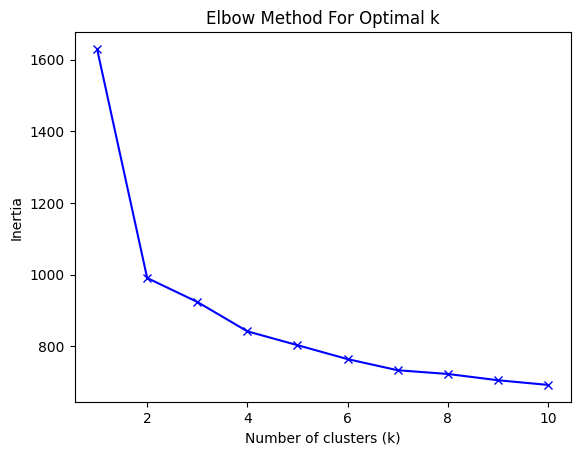

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_imputed)
    inertias.append(kmeans.inertia_)
print("Fitting KMeans on dataset with shape:", data_imputed.shape)

# Plot elbow curve
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


Evaluate Clustering Quality

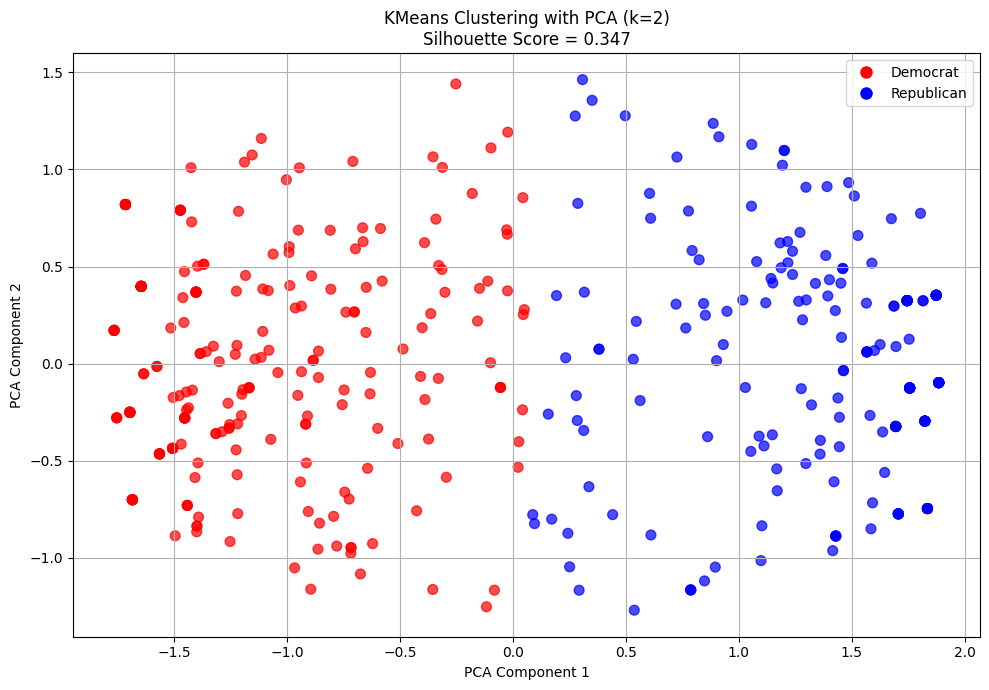

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.stats import mode

true_labels = LabelEncoder().fit_transform(df.iloc[:, 0])

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(data_imputed)

label_map = {}
for cluster in np.unique(cluster_labels):
    mask = cluster_labels == cluster
    majority_label = mode(true_labels[mask], keepdims=False).mode
    label_map[cluster] = majority_label

mapped_labels = np.array([label_map[label] for label in cluster_labels])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_imputed)

colors = ['red' if label == 0 else 'blue' for label in mapped_labels]
labels_text = ['Democrat' if label == 0 else 'Republican' for label in mapped_labels]

plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=colors, s=50, alpha=0.7)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Democrat', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Republican', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=legend_elements)


sil_score = silhouette_score(data_imputed, cluster_labels)
plt.title(f'KMeans Clustering with PCA (k=2)\nSilhouette Score = {sil_score:.3f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


Compare Clusters to Original Labels

dimensionality reduction to get from 14 dimensions (amount of collumns) to 2 dimensions
pca -- principle component analysis

> Add blockquote



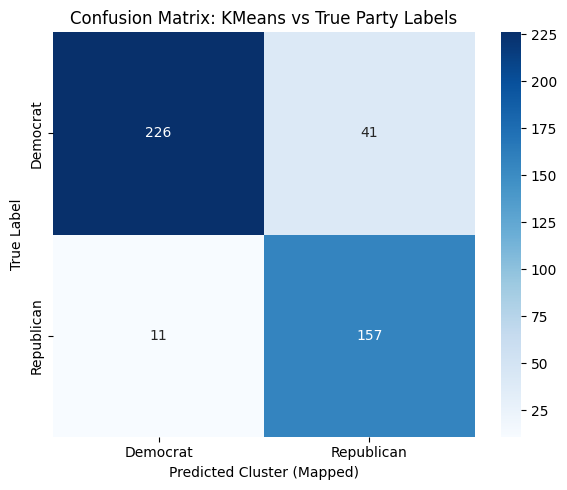

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, mapped_labels)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Democrat', 'Republican'],
            yticklabels=['Democrat', 'Republican'])
plt.xlabel('Predicted Cluster (Mapped)')
plt.ylabel('True Label')
plt.title('Confusion Matrix: KMeans vs True Party Labels')
plt.tight_layout()
plt.show()
